In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Carregamento dos dados
OBS. Usei o skiprows para ignorar a primeira linha e remover o "# Constructed from biom file"

In [7]:
df = pd.read_csv("tabela.tsv", sep="\t", skiprows=1)

In [8]:
df.head(3)

,#OTU ID,16S-Amostra1,16S-Amostra2,taxonomy
0,321501a64794e926be7b961674c35a0f,0.0,1170.0,d__Bacteria; p__Actinobacteriota; c__Actinomyc...
1,2c47537f334048fd1472da325f00561d,0.0,316.0,d__Bacteria; p__Actinobacteriota; c__Actinomyc...
2,4a1547af0bbae2aff8f3222d2fba2102,179.0,0.0,d__Bacteria; p__Firmicutes_A; c__Clostridia; o...


## Cálculo da Abundância Relativa:

Gênero:

In [25]:
df["Genero"] = df["taxonomy"].str.extract(r"g__(\w+)")
#df.head(2)

Arupar por gênero e somar as contagens

In [29]:
genero_abundancia = df.groupby("Genero")[["16S-Amostra1", "16S-Amostra2"]].sum()
genero_abundancia

,16S-Amostra1,16S-Amostra2
Genero,,
Acetatifactor,21.0,0.0
Actinopolyspora,0.0,34.0
Agathobacter,88.0,0.0
Agathobaculum,39.0,0.0
Akkermansia,5.0,0.0
...,...,...
UBA3402,16.0,0.0
UBA7597,14.0,0.0
UMGS1375,11.0,0.0


Calcular a abundância relativa (%)
OBS. Arredondei para 2 casas decimais

In [ ]:
genero_abundancia_relativa = (genero_abundancia.div(genero_abundancia.sum()) * 100).round(2)
genero_abundancia_relativa.columns = ["Amostra 1 (%)", "Amostra 2 (%)"]
genero_abundancia_relativa = genero_abundancia_relativa.reset_index() 
genero_abundancia_relativa

#Mostrar todas as linhas da tabela depois

,Genero,Amostra 1 (%),Amostra 2 (%)
0,Acetatifactor,0.86,0.00
1,Actinopolyspora,0.00,1.19
2,Agathobacter,3.59,0.00
3,Agathobaculum,1.59,0.00
4,Akkermansia,0.20,0.00
...,...,...,...
66,UBA3402,0.65,0.00
67,UBA7597,0.57,0.00
68,UMGS1375,0.45,0.00
69,UMGS882,1.31,0.00


## Gráfico de Barras Empilhadas

Primeira tentativa de gráfico

C:\Users\clebe\AppData\Local\Temp\ipykernel_24352\663322040.py:41: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


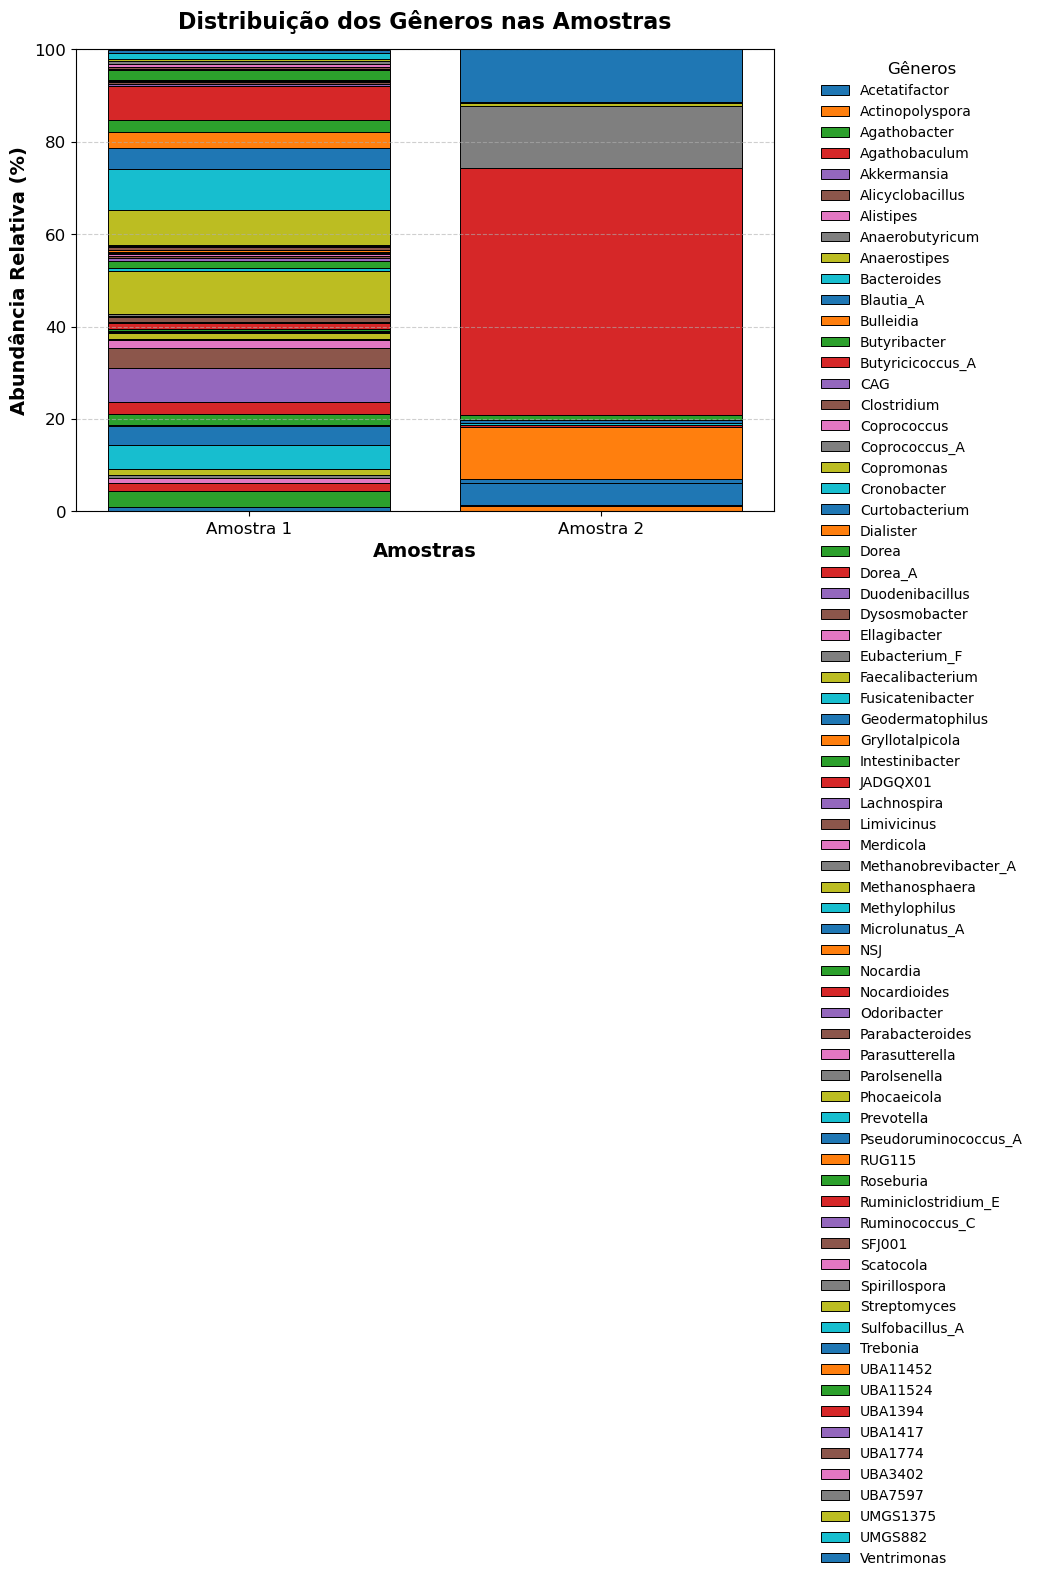

In [ ]:
num_generos = len(genero_abundancia_relativa["Genero"].unique())

amostras = ["Amostra 1", "Amostra 2"]
fig, ax = plt.subplots(figsize=(9, 6))

bottom = np.array([0.0, 0.0])
for i, genero in enumerate(genero_abundancia_relativa["Genero"]):
    valores = genero_abundancia_relativa.loc[
        genero_abundancia_relativa["Genero"] == genero, ["Amostra 1 (%)", "Amostra 2 (%)"]
    ].values.flatten()
    
    ax.bar(
        amostras, valores, 
        label=genero, 
        bottom=bottom, 
        #color=cores[i], 
        edgecolor="black",
        linewidth=0.7
    )
    bottom += valores.astype(float)

ax.set_ylabel("Abundância Relativa (%)", fontsize=14, fontweight="bold")
ax.set_xlabel("Amostras", fontsize=14, fontweight="bold")
ax.set_title("Distribuição dos Gêneros nas Amostras", fontsize=16, fontweight="bold", pad=15)

ax.grid(axis="y", linestyle="--", alpha=0.6)

ax.legend(
    title="Gêneros", 
    bbox_to_anchor=(1.05, 1), 
    loc="upper left", 
    title_fontsize=12, 
    fontsize=10, 
    frameon=False
)

plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

Melhorias de layout

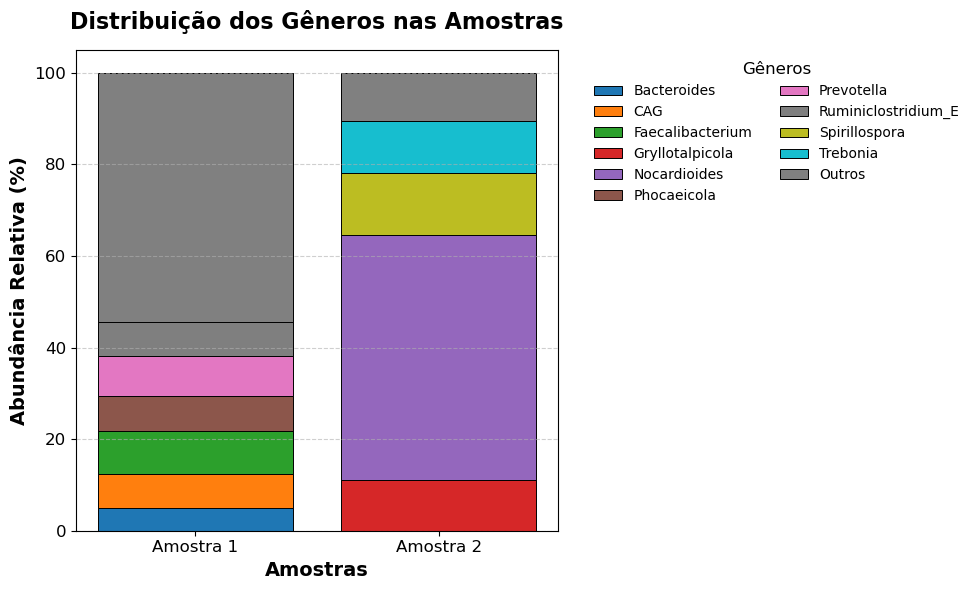

In [44]:
num_generos = len(genero_abundancia_relativa["Genero"].unique())

amostras = ["Amostra 1", "Amostra 2"]
fig, ax = plt.subplots(figsize=(10, 6))

# Agrupando gêneros com valores pequenos em "Outros"
threshold = 5  # Limite de 5% de abundância para considerar como "Outros"
bottom = np.array([0.0, 0.0])

# Lista para armazenar gêneros que serão combinados em "Outros"
outros_abundancia = np.zeros(2)

for i, genero in enumerate(genero_abundancia_relativa["Genero"]):
    valores = genero_abundancia_relativa.loc[
        genero_abundancia_relativa["Genero"] == genero, ["Amostra 1 (%)", "Amostra 2 (%)"]
    ].values.flatten()

    if np.sum(valores) < threshold:  
        outros_abundancia += valores
        continue

    ax.bar(
        amostras, valores, 
        label=genero, 
        bottom=bottom, 
        edgecolor="black",
        linewidth=0.7
    )
    bottom += valores.astype(float)

# Adiciona a categoria "Outros"
if np.any(outros_abundancia > 0):
    ax.bar(
        amostras, outros_abundancia, 
        label="Outros", 
        bottom=bottom, 
        color='gray',  # Cor neutra para "Outros"
        edgecolor="black",
        linewidth=0.7
    )

ax.set_ylabel("Abundância Relativa (%)", fontsize=14, fontweight="bold")
ax.set_xlabel("Amostras", fontsize=14, fontweight="bold")
ax.set_title("Distribuição dos Gêneros nas Amostras", fontsize=16, fontweight="bold", pad=15)
ax.grid(axis="y", linestyle="--", alpha=0.6)

ax.legend(
    title="Gêneros", 
    bbox_to_anchor=(1.05, 1), 
    loc="upper left", 
    title_fontsize=12, 
    fontsize=10, 
    frameon=False, 
    ncol=2
)

plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

Terceira tentativa de gráfico

C:\Users\clebe\AppData\Local\Temp\ipykernel_24352\3137934833.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(genero_abundancia_relativa["Genero"], rotation=45, fontsize=12)
C:\Users\clebe\AppData\Local\Temp\ipykernel_24352\3137934833.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(genero_abundancia_relativa["Genero"], rotation=45, fontsize=12)


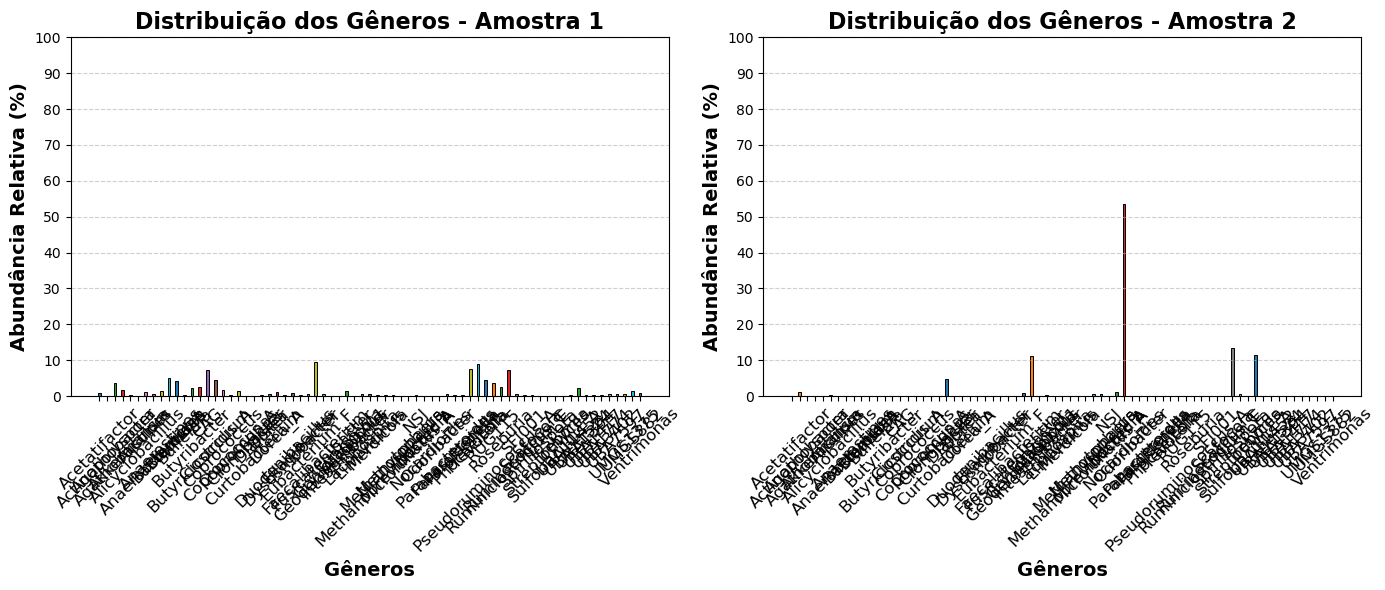

In [47]:
num_generos = len(genero_abundancia_relativa["Genero"])
amostras = ["Amostra 1", "Amostra 2"]

# Criando 2 gráficos separados
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Ajustar a largura das barras
largura = 0.35

# Gerar gráfico para Amostra 1
for i, genero in enumerate(genero_abundancia_relativa["Genero"]):
    valores_amostra1 = genero_abundancia_relativa.loc[
        genero_abundancia_relativa["Genero"] == genero, "Amostra 1 (%)"
    ].values[0]
    
    ax1.bar(
        genero, valores_amostra1, 
        width=largura, 
        label=genero, 
        edgecolor="black",
        linewidth=0.7
    )

ax1.set_ylabel("Abundância Relativa (%)", fontsize=14, fontweight="bold")
ax1.set_title("Distribuição dos Gêneros - Amostra 1", fontsize=16, fontweight="bold")
ax1.grid(axis="y", linestyle="--", alpha=0.6)
ax1.set_xlabel("Gêneros", fontsize=14, fontweight="bold")
ax1.set_xticklabels(genero_abundancia_relativa["Genero"], rotation=45, fontsize=12)
ax1.set_yticks(np.arange(0, 101, 10))  # Ajustar as marcações no eixo y

# Gerar gráfico para Amostra 2
for i, genero in enumerate(genero_abundancia_relativa["Genero"]):
    valores_amostra2 = genero_abundancia_relativa.loc[
        genero_abundancia_relativa["Genero"] == genero, "Amostra 2 (%)"
    ].values[0]
    
    ax2.bar(
        genero, valores_amostra2, 
        width=largura, 
        label=genero, 
        edgecolor="black",
        linewidth=0.7
    )

ax2.set_ylabel("Abundância Relativa (%)", fontsize=14, fontweight="bold")
ax2.set_title("Distribuição dos Gêneros - Amostra 2", fontsize=16, fontweight="bold")
ax2.grid(axis="y", linestyle="--", alpha=0.6)
ax2.set_xlabel("Gêneros", fontsize=14, fontweight="bold")
ax2.set_xticklabels(genero_abundancia_relativa["Genero"], rotation=45, fontsize=12)
ax2.set_yticks(np.arange(0, 101, 10))  # Ajustar as marcações no eixo y

# Ajustar espaçamento entre os gráficos
plt.tight_layout()

# Exibir a legenda no gráfico de Amostra 1
#ax1.legend(title="Gêneros", title_fontsize=12, fontsize=10, frameon=False)

# Exibir os gráficos
plt.show()